In [1]:
import matplotlib.pyplot as plt
from skimage import io
import numpy

# Load image file
fpath = 'C:/Users/fxk/PycharmProjects/tenjumh/Computer Vision/Image Segmentation_kmeans/'
image = io.imread(fpath + 'wallpaper.jpg')

In [2]:
# image -> RGB vector conversion
sizeI, sizeJ, sizeK = image.shape
imageRGBvect = numpy.zeros((sizeI*sizeJ, sizeK))
#print(imageRGBvect.shape)
imageRGBvectIdx = 0
i = 0
while i < sizeI:
    j = 0
    while j < sizeJ:
        imageRGBvect[imageRGBvectIdx, :] = image[i, j, :]
        imageRGBvectIdx += 1
        j += 1
    i += 1

In [3]:
# Kmeans initialization
k = 3
ClusterCenters = numpy.random.randint(low=0, high=255, size=(k, 3))
print(ClusterCenters.shape)
print(ClusterCenters)

(3, 3)
[[167 137  85]
 [ 70 210 190]
 [ 43  99  91]]


In [4]:
# Kmeans
convergeLimit = 10
deltaMeans = 99999
maxIter = 10000
iterN = 0
while deltaMeans > convergeLimit and iterN < maxIter:
    iterN += 1

    # Calculate every distance from center to points
    dist2Centers = numpy.sqrt(((imageRGBvect - ClusterCenters[:, numpy.newaxis])**2).sum(axis=2))
    
    # Cluster assignment to the closest center
    clustersAssigned = numpy.argmin(dist2Centers, axis=0)

    # ClusterCenter update
    NewClusterCenters = numpy.zeros((3,3))
    i = 0
    while i < k:
        clusterList = numpy.where(clustersAssigned == i)
        valueInlist = imageRGBvect[clusterList, ]
        NewClusterCenters[i, ] = valueInlist.mean(axis=1)
        i += 1

    # Calculate convergence
    deltaMeans = NewClusterCenters - ClusterCenters
    deltaMeans = numpy.square(deltaMeans)
    deltaMeans = numpy.sqrt(deltaMeans.sum(axis=1)).sum()

    ClusterCenters = NewClusterCenters

In [5]:
# Convert image value to ClusterCenters
ClusterCenters = numpy.round(ClusterCenters).astype('uint8')

imageClustered = numpy.zeros(image.shape).astype('uint8')

imageRGBvectIdx = 0
i = 0
while i < sizeI:
    j = 0
    while j < sizeJ:
        imageClustered[i, j, :] = ClusterCenters[clustersAssigned[imageRGBvectIdx],:]
        imageRGBvectIdx += 1
        j += 1
    i += 1

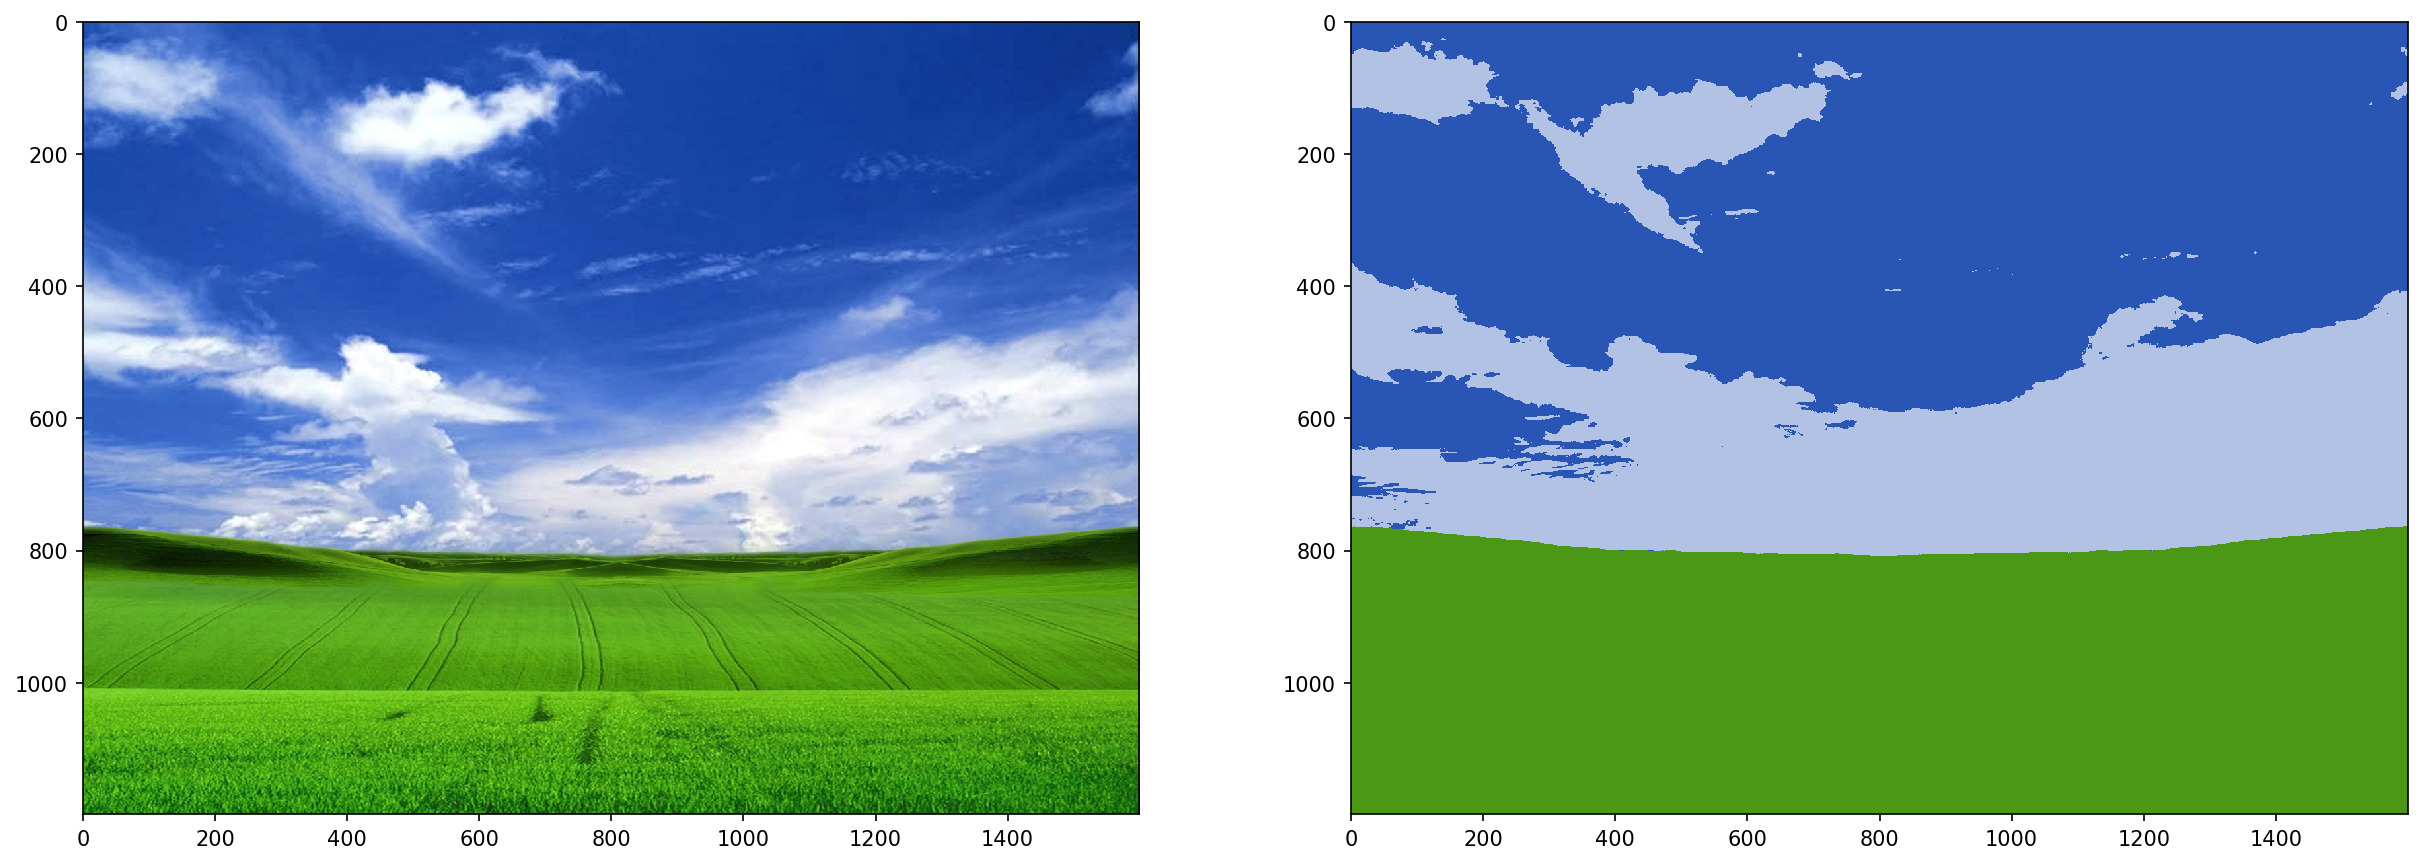

In [6]:
# Plot
plt.figure(figsize=(20, 10), dpi=150)
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray', vmin=0, vmax=255)

plt.subplot(1, 2, 2)
plt.imshow(imageClustered, cmap='gray', vmin=0, vmax=255)

plt.show()